# Statistical inference

*This chapter has been adapted from [Data Science: A First Introduction (Python Edition](https://python.datasciencebook.ca/inference.html), by Trevor Campbell, Tiffany Timbers, Melissa Lee, Lindsey Heagy, and Joel Ostblom of UBC.*

## Overview

A typical data analysis task in practice is to draw conclusions about some
unknown aspect of a population of interest based on observed data sampled from
that population; we typically do not get data on the *entire* population.  Data
analysis questions regarding how summaries, patterns, trends, or relationships
in a data set extend to the wider population are called *inferential
questions*. This chapter will start with the fundamental ideas of sampling from
populations and then introduce two common techniques in statistical inference:
*point estimation* and *interval estimation*.

## Chapter learning objectives

By the end of the chapter, readers will be able to do the following:

* Describe real-world examples of questions that can be answered with statistical inference.
* Define common population parameters (e.g., mean, proportion, standard deviation) that are often estimated using sampled data, and estimate these from a sample.
* Define the following statistical sampling terms (population, sample, population parameter, point estimate, sampling distribution).
* Explain the difference between a population parameter and a sample point estimate.
* Use Python to draw random samples from a finite population.
* Use Python to create a sampling distribution from a finite population.
* Describe how sample size influences the sampling distribution.
* Define bootstrapping.
* Use Python to create a bootstrap distribution to approximate a sampling distribution.
* Contrast the bootstrap and sampling distributions.

## Why do we need sampling?

We often need to understand how quantities we observe in a subset
of data relate to the same quantities in the broader population. For example, suppose a
retailer is considering selling iPhone accessories, and they want to estimate
how big the market might be. Additionally, they want to strategize how they can
market their products on North American college and university campuses. This
retailer might formulate the following question:

*What proportion of all undergraduate students in North America own an iPhone?*

In the above question, we are interested in making a conclusion about *all*
undergraduate students in North America; this is referred to as the **population**. In
general, the population is the complete collection of individuals or cases we
are interested in studying.  Further, in the above question, we are interested
in computing a quantity&mdash;the proportion of iPhone owners&mdash;based on
the entire population. This proportion is referred to as a **population parameter**. In
general, a population parameter is a numerical characteristic of the entire
population. To compute this number in the example above, we would need to ask
every single undergraduate in North America whether they own an iPhone. In
practice, directly computing population parameters is often time-consuming and
costly, and sometimes impossible.

A more practical approach would be to make measurements from a **sample**, i.e., a
subset of individuals collected from the population. We can then compute a
**sample estimate**&mdash;a numerical characteristic of the sample&mdash;that
estimates the population parameter. For example, suppose we randomly selected
ten undergraduate students across North America (the sample) and computed the
proportion of those students who own an iPhone (the sample estimate). In that
case, we might suspect that proportion is a reasonable estimate of the
proportion of students who own an iPhone in the entire population.
The figure below illustrates this process.
In general, the process of using a sample to make a conclusion about the
broader population from which it is taken is referred to as **statistical inference**.

![](img/inference/population_vs_sample.png)

Note that proportions are not the *only* kind of population parameter we might
be interested in. For example, suppose an undergraduate student studying at the University
of British Columbia in Canada is looking for an apartment
to rent. They need to create a budget, so they want to know something about
studio apartment rental prices in Vancouver, BC. This student might
formulate the following question:

*What is the average price-per-month of studio apartment rentals in Vancouver, Canada?*

In this case, the population consists of all studio apartment rentals in Vancouver, and the
population parameter is the *average price-per-month*. Here we used the average
as a measure of the center to describe the "typical value" of studio apartment
rental prices. But even within this one example, we could also be interested in
many other population parameters. For instance, we know that not every studio
apartment rental in Vancouver will have the same price per month. The student
might be interested in how much monthly prices vary and want to find a measure
of the rentals' spread (or variability), such as the standard deviation. Or perhaps the
student might be interested in the fraction of studio apartment rentals that
cost more than \$1000 per month. The question we want to answer will help us
determine the parameter we want to estimate. If we were somehow able to observe
the whole population of studio apartment rental offerings in Vancouver, we
could compute each of these numbers exactly; therefore, these are all
population parameters. There are many kinds of observations and population
parameters that you will run into in practice, but in this chapter, we will
focus on two settings:

1. Using categorical observations to estimate the proportion of a category
2. Using quantitative observations to estimate the average (or mean)

## Sampling distributions

### Sampling distributions for proportions

We will look at an example using data from
[Inside Airbnb](http://insideairbnb.com/). Airbnb is an online
marketplace for arranging vacation rentals and places to stay. The data set
contains listings for Vancouver, Canada, in September 2020. Our data
includes an ID number, neighborhood, type of room, the number of people the
rental accommodates, number of bathrooms, bedrooms, beds, and the price per
night.

In [1]:
# Start off with standard imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [2]:
# Read in data
airbnb = pd.read_csv("data/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1,Downtown,Entire home/apt,5,2 baths,2,2,150.00
1,2,Downtown Eastside,Entire home/apt,4,2 baths,2,2,132.00
2,3,West End,Entire home/apt,2,1 bath,1,1,85.00
3,4,Kensington-Cedar Cottage,Entire home/apt,2,1 bath,1,0,146.00
4,5,Kensington-Cedar Cottage,Entire home/apt,4,1 bath,1,2,110.00
...,...,...,...,...,...,...,...,...
4589,4590,Downtown Eastside,Entire home/apt,5,1 bath,1,1,99.00
4590,4591,Oakridge,Private room,2,1.5 baths,1,1,42.51
4591,4592,Dunbar Southlands,Private room,2,1.5 shared baths,1,1,53.29
4592,4593,West End,Entire home/apt,4,1 bath,2,2,145.00


Suppose the city of Vancouver wants information about Airbnb rentals to help
plan city bylaws, and they want to know how many Airbnb places are listed as
entire homes and apartments (rather than as private or shared rooms). Therefore
they may want to estimate the true proportion of all Airbnb listings where the
room type is listed as "entire home or apartment." Of course, we usually
do not have access to the true population, but here let's imagine (for learning
purposes) that our data set represents the population of all Airbnb rental
listings in Vancouver, Canada.
We can find the proportion of listings for each room type
by using the `value_counts` function with the `normalize` parameter. `value_counts` returns a Series object containing counts of unique values, and `normalize`, if set to True,  will normalize these counts and convert them to proportions. 

In [3]:
airbnb["room_type"].value_counts(normalize=True)

Entire home/apt    0.747497
Private room       0.246408
Shared room        0.005224
Hotel room         0.000871
Name: room_type, dtype: float64

We can see that the proportion of `Entire home/apt` listings in
the data set is 0.747. This
value, 0.747, is the population parameter. **Remember, this
parameter value is usually unknown in real data analysis problems, *as it is
typically not possible to make measurements for an entire population.***

Instead, perhaps we can approximate it with a small subset of data!
To investigate this idea, let's try randomly selecting 40 listings (*i.e.,* taking a random sample of
size 40 from our population), and computing the proportion for that sample.
We will use the `sample` method of the `pandas.DataFrame`
object to take the sample. The argument `n` of `sample` is the size of the sample to take
and since we are starting to use randomness here,
we are also setting the random seed via numpy to make the results reproducible. Setting the seed means that our program's random number generator will output the same sequence of "random" numbers each time we run this program. (You can Google "why random number generators aren't random" if you're interested in this apparent paradox). 

In [4]:
# Set seed for reproducible results
np.random.seed(155)
airbnb.sample(n=40)["room_type"].value_counts(normalize=True)

Entire home/apt    0.725
Private room       0.250
Shared room        0.025
Name: room_type, dtype: float64

Here we see that the proportion of entire home/apartment listings in this
random sample is 0.725. Wow&mdash;that's close to our
true population value! But remember, we computed the proportion using a random sample of size 40.
This has two consequences. First, this value is only an *estimate*, i.e., our best guess
of our population parameter using this sample.
Given that we are estimating a single value here, we often
refer to it as a **point estimate**.  Second, since the sample was random,
if we were to take *another* random sample of size 40 and compute the proportion for that sample,
we would not get the same answer:

In [5]:
airbnb.sample(n=40)["room_type"].value_counts(normalize=True)

Entire home/apt    0.625
Private room       0.350
Shared room        0.025
Name: room_type, dtype: float64

Confirmed! We get a different value for our estimate this time.
That means that our point estimate might be unreliable. Indeed, estimates vary from sample to
sample due to **sampling variability**. But just how much
should we expect the estimates of our random samples to vary?
Or in other words, how much can we really trust our point estimate based on a single sample?

To understand this, we will simulate many samples (much more than just two)
of size 40 from our population of listings and calculate the proportion of
entire home/apartment listings in each sample. This simulation will create
many sample proportions, which we can visualize using a histogram. The
distribution of the estimate for all possible samples of a given size (which we
commonly refer to as $n$) from a population is called
a **sampling distribution**. The sampling distribution will help us see how much we would
expect our sample proportions from this population to vary for samples of size 40.

We again use the `sample` to take samples of size 40 from our
population of Airbnb listings. But this time we use a list comprehension
to repeat an operation multiple time (as in previous chapters).
In this case we are taking 20,000 samples of size 40
and to make it clear which rows in the data frame come
which of the 20,000 samples,
we also add ("assign") a column called `replicate` with this information.
The call to `concat` concatenates all the 20,000 data frames
returned from the list comprehension into a single big data frame.

In [6]:
# Use list comprehension 
samples = pd.concat([
    airbnb.sample(40).assign(replicate=n) for n in range(20000)
])
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
605,606,Marpole,Entire home/apt,3,1 bath,1,1,91.0,0
4579,4580,Downtown,Entire home/apt,3,1 bath,1,2,160.0,0
1739,1740,West End,Entire home/apt,2,1 bath,1,2,151.0,0
3904,3905,Oakridge,Private room,6,1 private bath,3,3,185.0,0
1596,1597,Kitsilano,Entire home/apt,1,1 bath,1,1,99.0,0
...,...,...,...,...,...,...,...,...,...
3060,3061,Hastings-Sunrise,Private room,2,3.5 shared baths,1,1,78.0,19999
527,528,Kitsilano,Private room,4,1 private bath,1,1,99.0,19999
1587,1588,Downtown,Entire home/apt,6,1 bath,1,3,169.0,19999
3860,3861,Downtown,Entire home/apt,3,1 bath,1,1,100.0,19999


Since the column `replicate` indicates the replicate/sample number,
we can verify that we indeed seem to have 20,0000 samples
starting at sample 0 and ending at sample 19,999.

Now that we have obtained the samples, we need to compute the
proportion of entire home/apartment listings in each sample.
We first `query` the observations with room type of "Entire home/apt";
group the data by the `replicate` variable&mdash;to group the
set of listings in each sample together&mdash;and then use `count`
to compute the number of qualified observations in each sample; finally compute the proportion.
Both the first and last few entries of the resulting data frame are printed
below to show that we end up with 20,000 point estimates, one for each of the 20,000 samples.

In [7]:
samples.groupby("replicate")["room_type"].value_counts(normalize=True)

replicate  room_type      
0          Entire home/apt    0.750
           Private room       0.250
1          Entire home/apt    0.775
           Private room       0.225
2          Entire home/apt    0.750
                              ...  
19998      Entire home/apt    0.700
           Private room       0.275
           Shared room        0.025
19999      Entire home/apt    0.750
           Private room       0.250
Name: room_type, Length: 44552, dtype: float64

The returned object is a series,
and as we have previously learned
we can use `reset_index` to change it to a data frame.
However,
there is one caveat here:
when we use the `value_counts` function
on a grouped series and try to `reset_index`
we will end up with two columns with the same name
and therefore get an error
(in this case, `room_type` will occur twice).
Fortunately,
there is a simple solution:
when we call `reset_index`,
we can specify the name of the new column
with the `name` parameter:

In [8]:
samples.groupby("replicate")["room_type"].value_counts(normalize=True).reset_index(name="sample_proportion")

,replicate,room_type,sample_proportion
0,0,Entire home/apt,0.750
1,0,Private room,0.250
2,1,Entire home/apt,0.775
3,1,Private room,0.225
4,2,Entire home/apt,0.750
...,...,...,...
44547,19998,Entire home/apt,0.700
44548,19998,Private room,0.275
44549,19998,Shared room,0.025
44550,19999,Entire home/apt,0.750


Below we put everything together
and also filter the data frame to keep only the room types 
that we are interested in.

In [9]:
sample_estimates = (
    samples
    .groupby("replicate")
    ["room_type"]
    .value_counts(normalize=True)
    .reset_index(name="sample_proportion")
)

sample_estimates = sample_estimates[sample_estimates["room_type"] == "Entire home/apt"]
sample_estimates

,replicate,room_type,sample_proportion
0,0,Entire home/apt,0.750
2,1,Entire home/apt,0.775
4,2,Entire home/apt,0.750
6,3,Entire home/apt,0.675
8,4,Entire home/apt,0.725
...,...,...,...
44541,19995,Entire home/apt,0.775
44543,19996,Entire home/apt,0.750
44545,19997,Entire home/apt,0.725
44547,19998,Entire home/apt,0.700


We can now visualize the sampling distribution of sample proportions
for samples of size 40 using a histogram. Keep in mind: in the real world,
we don't have access to the full population. So we
can't take many samples and can't actually construct or visualize the sampling distribution.
We have created this particular example
such that we *do* have access to the full population, which lets us visualize the
sampling distribution directly for learning purposes.

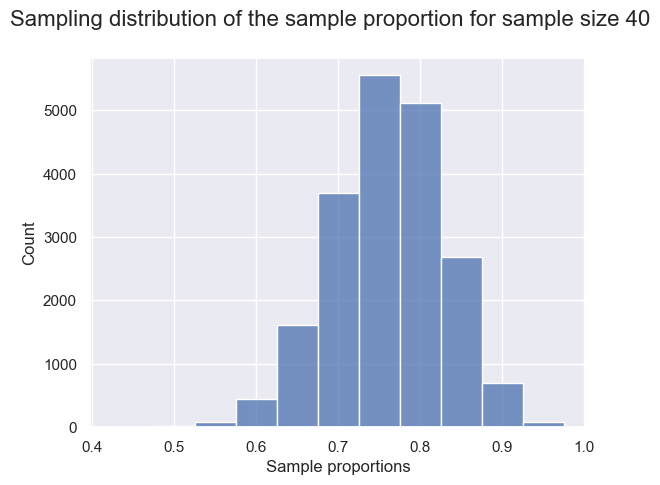

In [10]:
fig, ax = plt.subplots()
sns.histplot(data=sample_estimates, x="sample_proportion", ax=ax, binwidth=0.05)
ax.set_xlabel("Sample proportions")
fig.suptitle("Sampling distribution of the sample proportion for sample size 40", fontsize=16)
plt.show()

The sampling distribution above appears
to be bell-shaped, is roughly symmetric, and has one peak. It is centered
around 0.75 and the sample proportions
range from about 0.55 to about
0.95. In fact, we can
calculate the mean of the sample proportions.

In [11]:
sample_estimates["sample_proportion"].mean()

0.74848375

We notice that the sample proportions are centered around the population
proportion value,0.748! In general, the mean of
the sampling distribution should be equal to the population proportion.
This is great news because it means that the sample proportion is neither an overestimate nor an
underestimate of the population proportion.
In other words, if you were to take many samples as we did above, there is no tendency
towards over or underestimating the population proportion.
In a real data analysis setting where you just have access to your single
sample, this implies that you would suspect that your sample point estimate is
roughly equally likely to be above or below the true population proportion.

### Sampling distributions for means

In the previous section, our variable of interest&mdash;`room_type`&mdash;was
*categorical*, and the population parameter was a proportion. As mentioned in
the chapter introduction, there are many choices of the population parameter
for each type of variable. What if we wanted to infer something about a
population of *quantitative* variables instead? For instance, a traveler
visiting Vancouver, Canada may wish to estimate the
population *mean* (or average) price per night of Airbnb listings. Knowing
the average could help them tell whether a particular listing is overpriced.
We can visualize the population distribution of the price per night with a histogram.

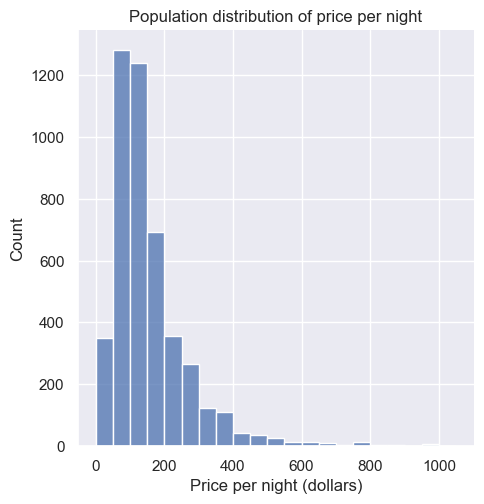

In [12]:
g = sns.displot(data=airbnb, x="price", bins=np.linspace(0, 1050, 22))
g.set(xlabel="Price per night (dollars)", title="Population distribution of price per night")
plt.show()

In this figure, we see that the population distribution
has one peak. It is also skewed (i.e., is not symmetric): most of the listings are
less than \$250 per night, but a small number of listings cost much more,
creating a long tail on the histogram's right side.
Along with visualizing the population, we can calculate the population mean,
the average price per night for all the Airbnb listings.

In [13]:
airbnb["price"].mean()

154.5109773617762

The price per night of all Airbnb rentals in Vancouver, BC
is $154.51, on average. This value is our
population parameter since we are calculating it using the population data.

Now suppose we did not have access to the population data (which is nearly *always* the
case!), yet we wanted to estimate the mean price per night. We could answer
this question by taking a random sample of as many Airbnb listings as our time
and resources allow. Let's say we could do this for 40 listings. What would
such a sample look like?  Let's take advantage of the fact that we do have
access to the population data and simulate taking one random sample of 40
listings in Python, again using `sample`.

In [14]:
one_sample = airbnb.sample(40)

We can create a histogram to visualize the distribution of observations in the
sample, and calculate the mean
of our sample.

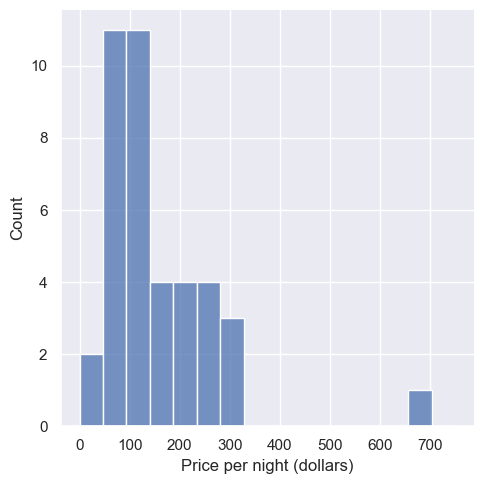

In [15]:
g = sns.displot(data=one_sample, x="price", bins=np.linspace(0, 750, 17))
g.set(xlabel="Price per night (dollars)")
plt.show()

In [16]:
one_sample["price"].mean()

153.48225

The average value of the sample of size 40
is \\$152.48. This
number is a point estimate for the mean of the full population.
Recall that the population mean was
\\$154.51. So our estimate was fairly close to
the population parameter: the mean was about
0.7%
off.  Note that we usually cannot compute the estimate's accuracy in practice
since we do not have access to the population parameter; if we did, we wouldn't
need to estimate it!


Also, recall from the previous section that the point estimate can vary; if we
took another random sample from the population, our estimate's value might
change. So then, did we just get lucky with our point estimate above?  How much
does our estimate vary across different samples of size 40 in this example?
Again, since we have access to the population, we can take many samples and
plot the sampling distribution of sample means to get a sense for this variation.
In this case, we'll use the 20,000 samples of size
40 that we already stored in the `samples` variable.
First we will calculate the sample mean for each replicate
and then plot the sampling
distribution of sample means for samples of size 40.

In [17]:
sample_estimates = (
    samples
    .groupby("replicate")
    ["price"]
    .mean()
    .reset_index()
    .rename(columns={"price": "mean_price"})
)
sample_estimates

,replicate,mean_price
0,0,187.00000
1,1,148.56075
2,2,165.50500
3,3,140.93925
4,4,139.14650
...,...,...
19995,19995,198.50000
19996,19996,192.66425
19997,19997,144.88600
19998,19998,146.08800


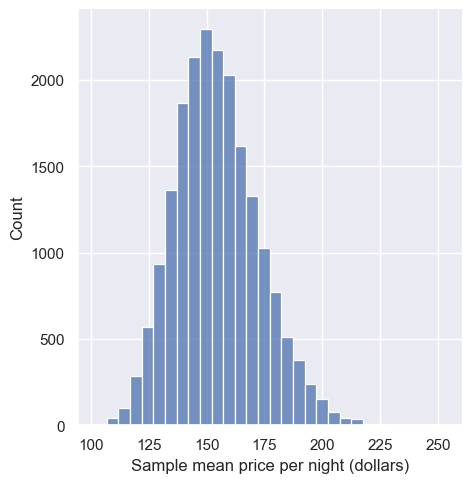

In [18]:
sns.displot(data=sample_estimates, x="mean_price", bins=30)
plt.xlabel('Sample mean price per night (dollars)')
plt.ylabel('Count')
plt.show()

In the figure above, the sampling distribution of the mean
has one peak and is bell-shaped. Most of the estimates are between
about  \\$140 and
\\$160; but there are
a good fraction of cases outside this range (i.e., where the point estimate was
not close to the population parameter). So it does indeed look like we were
quite lucky when we estimated the population mean with only
0.7% error.

Let's visualize the population distribution, distribution of the sample, and
the sampling distribution on one plot to compare them. Comparing these three distributions, the centers
of the distributions are all around the same price (around \$150). The original
population distribution has a long right tail, and the sample distribution has
a similar shape to that of the population distribution. However, the sampling
distribution is not shaped like the population or sample distribution. Instead,
it has a bell shape, and it has a lower spread than the population or sample
distributions. The sample means vary less than the individual observations
because there will be some high values and some small values in any random
sample, which will keep the average from being too extreme.

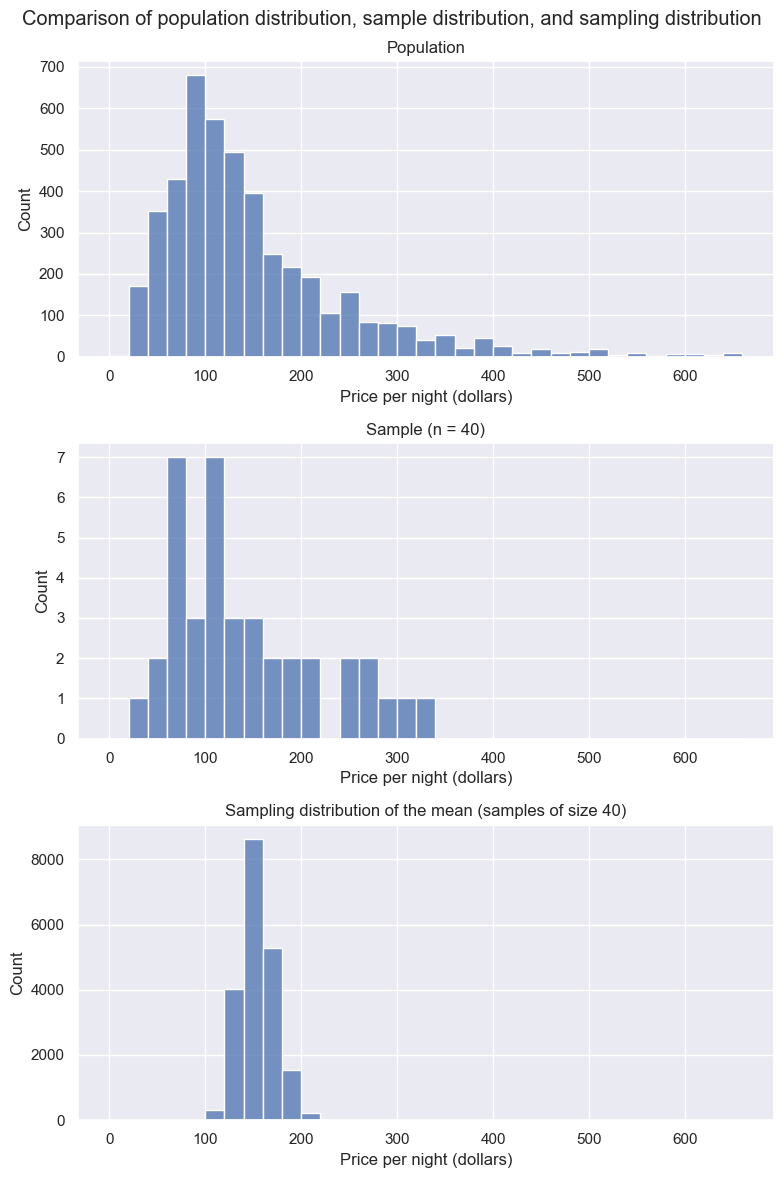

In [19]:
# Set up mutli-panel figure
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Population distribution
sns.histplot(airbnb['price'], bins=np.arange(0, 661, 20), ax=axs[0])
axs[0].set_title('Population')
axs[0].set_xlabel('Price per night (dollars)')
axs[0].set_ylabel('Count')

# Sample distribution
sns.histplot(one_sample['price'], bins=np.arange(0, 661, 20), ax=axs[1])
axs[1].set_title('Sample (n = 40)')
axs[1].set_xlabel('Price per night (dollars)')
axs[1].set_ylabel('Count')

# Sampling distribution
sns.histplot(sample_estimates['mean_price'], bins=np.arange(0, 661, 20), ax=axs[2])
axs[2].set_title('Sampling distribution of the mean (samples of size 40)')
axs[2].set_xlabel('Price per night (dollars)')
axs[2].set_ylabel('Count')

fig.suptitle("Comparison of population distribution, sample distribution, and sampling distribution")

plt.tight_layout()
plt.show()


Given that there is quite a bit of variation in the sampling distribution of
the sample mean&mdash;i.e., the point estimate that we obtain is not very
reliable&mdash;is there any way to improve the estimate?  One way to improve a
point estimate is to take a *larger* sample. To illustrate what effect this
has, we will take many samples of size 20, 50, 100, and 500, and plot the
sampling distribution of the sample mean. We indicate the mean of the sampling
distribution with a orange vertical line.

In [20]:
# Plot sampling distributions for multiple sample sizes
sample_sizes = [20, 50, 100, 500]
replicates = 20000

base = pd.concat([
    pd.concat([
        airbnb.sample(sample_size).assign(sample_size=sample_size, replicate=replicate)
        for sample_size in sample_sizes
    ])
    for replicate in range(replicates)
]).groupby(["sample_size", "replicate"], as_index=False)["price"].mean()


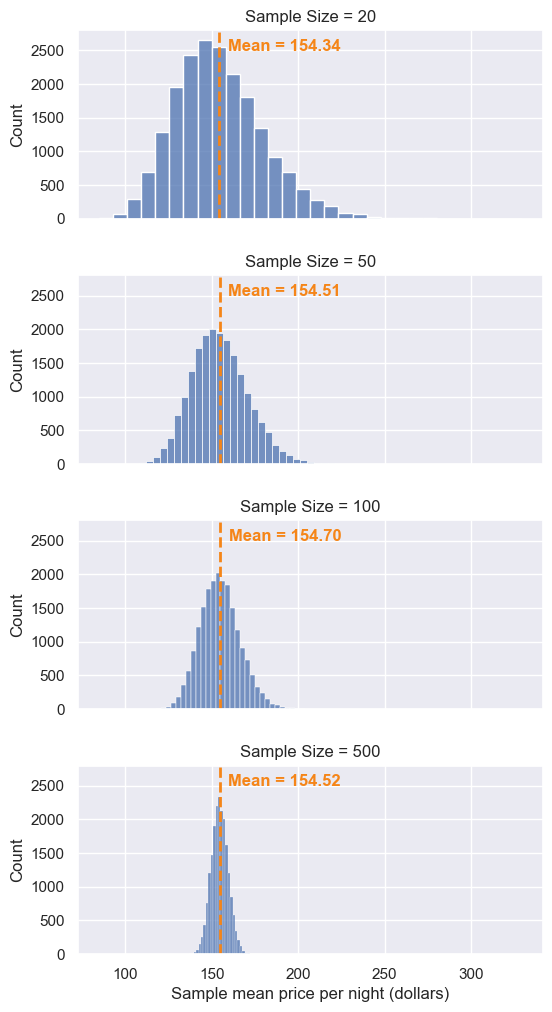

In [21]:
# Set up subplots 
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 12), sharex=True, sharey='row', gridspec_kw={'hspace': 0.3})

# Iterate through sample sizes
for i, sample_size in enumerate([20, 50, 100, 500]):
    ax = axs[i]

    # Plot histogram
    sns.histplot(data=base.loc[base['sample_size']==sample_size, 'price'],
                 bins=30, ax=ax)

    # Plot mean line
    mean_price = base.loc[base['sample_size'] == sample_size, 'price'].mean()
    ax.axvline(x=mean_price, color="#f58518", linestyle='--', linewidth=2)

    # Annotate mean value
    ax.text(mean_price + 5, 2500, f'Mean = {mean_price:.2f}', color="#f58518", size=12, fontweight='bold')

    # Set axis labels and title
    ax.set_ylim([0, 2800])
    ax.set_ylabel("Count")
    ax.set_title(f"Sample Size = {sample_size}")

# Set common x-axis label
axs[-1].set_xlabel("Sample mean price per night (dollars)")

# Plot
plt.show()

Based on the visualization above, three points
about the sample mean become clear:

1. The mean of the sample mean (across
   samples) is equal to the population mean. In other words, the sampling
   distribution is centered at the population mean.
2. Increasing the size of
   the sample decreases the spread (i.e., the variability) of the sampling
   distribution. Therefore, a larger sample size results in a more reliable point
   estimate of the population parameter.
3. The distribution of the sample mean is roughly bell-shaped.

<div class="alert alert-block alert-info">
    <b>Note:</b> You might notice that in the <b>n = 20</b> case in this figure,
    the distribution is not <i>quite</i> bell-shaped. There is a bit of skew towards the right!
    You might also notice that in the <b>n = 50</b> case and larger, that skew seems to disappear.
In general, the sampling distribution&mdash;for both means and proportions&mdash;only
    becomes bell-shaped <i>once the sample size is large enough</i>.
How large is "large enough?" Unfortunately, it depends entirely on the problem at hand. But
as a rule of thumb, often a sample size of at least 20 will suffice.
                            </div>

### Summary

1. A point estimate is a single value computed using a sample from a population (e.g., a mean or proportion).
2. The sampling distribution of an estimate is the distribution of the estimate for all possible samples of a fixed size from the same population.
3. The shape of the sampling distribution is usually bell-shaped with one peak and centered at the population mean or proportion.
4. The spread of the sampling distribution is related to the sample size. As the sample size increases, the spread of the sampling distribution decreases.

## Bootstrapping

### Overview

*Why all this emphasis on sampling distributions?*

We saw in the previous section that we could compute a **point estimate** of a
population parameter using a sample of observations from the population. And
since we constructed examples where we had access to the population, we could
evaluate how accurate the estimate was, and even get a sense of how much the
estimate would vary for different samples from the population.  But in real
data analysis settings, we usually have *just one sample* from our population
and do not have access to the population itself. Therefore we cannot construct
the sampling distribution as we did in the previous section. And as we saw, our
sample estimate's value can vary significantly from the population parameter.
So reporting the point estimate from a single sample alone may not be enough.
*We also need to report some notion of *uncertainty* in the value of the point
estimate.*

Unfortunately, we cannot construct the exact sampling distribution without
full access to the population. However, if we could somehow *approximate* what
the sampling distribution would look like for a sample, we could
use that approximation to then report how uncertain our sample
point estimate is (as we did above with the *exact* sampling
distribution). There are several methods to accomplish this; in this book, we
will use the *bootstrap*. We will discuss **interval estimation** and
construct
**confidence intervals** using just a single sample from a population. A
confidence interval is a range of plausible values for our population parameter.

Here is the key idea. First, if you take a big enough sample, it *looks like*
the population. Notice the histograms' shapes for samples of different sizes
taken from the population in the figure below. We
see that the sample’s distribution looks like that of the population for a
large enough sample.

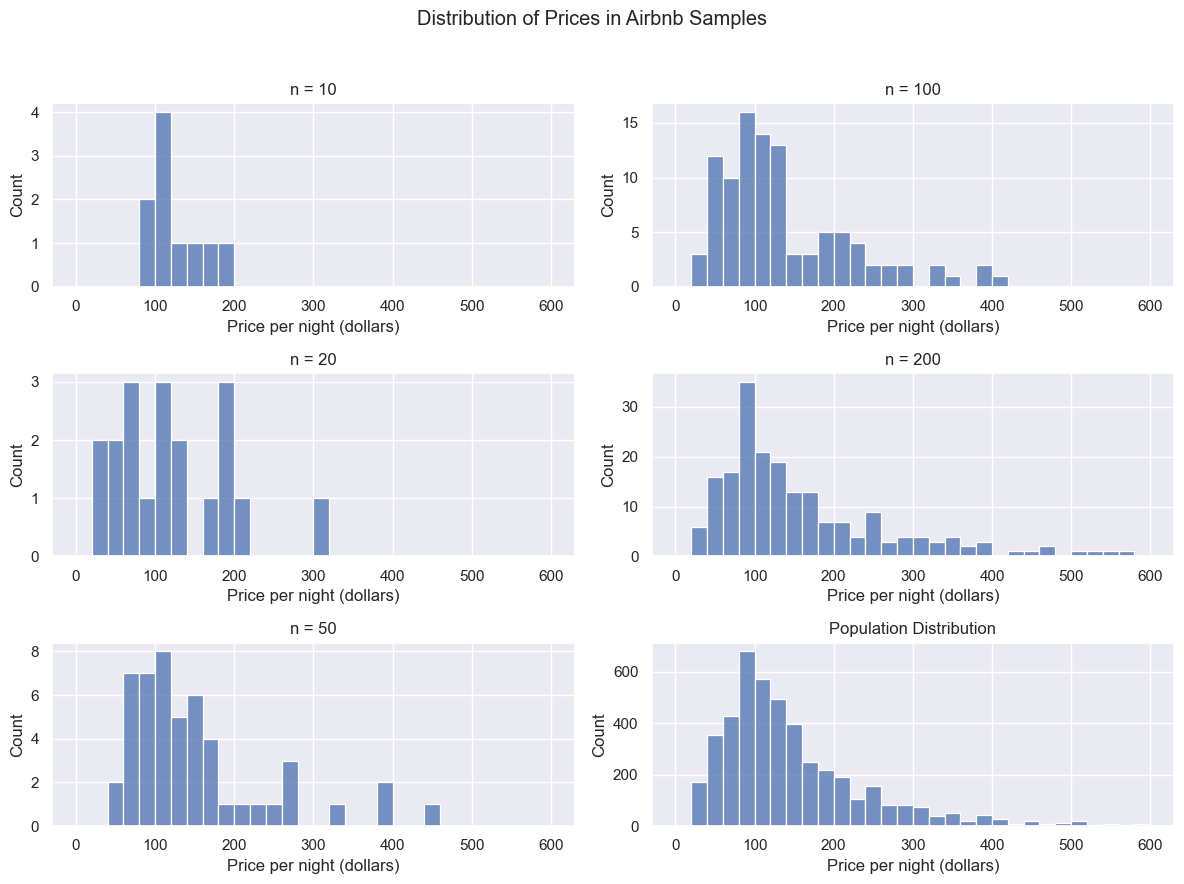

In [22]:
# Plot sample distributions for n = 10, 20, 50, 100, 200
sample_sizes = [10, 20, 50, 100, 200]

# Set up subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))
fig.suptitle('Distribution of Prices in Airbnb Samples')

# Plot population distribution
sns.histplot(airbnb['price'], bins=range(0, 601, 20), ax=axs[2, 1])
axs[2, 1].set_title('Population Distribution')
axs[2, 1].set_xlabel('Price per night (dollars)')
axs[2, 1].set_ylabel('Count')

# Plot sample distributions for different sample sizes
for i, sample_n in enumerate(sample_sizes):
    sample = airbnb.sample(sample_n)
    ax = axs[i % 3, i // 3]
    sns.histplot(sample['price'], bins=range(0, 601, 20), ax=ax)
    ax.set_title(f'n = {sample_n}')
    ax.set_xlabel('Price per night (dollars)')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In the previous section, we took many samples of the same size *from our
population* to get a sense of the variability of a sample estimate. But if our
sample is big enough that it looks like our population, we can pretend that our
sample *is* the population, and take more samples (with replacement) of the
same size from it instead! This very clever technique is
called **the bootstrap**.  Note that by taking many samples from our single, observed
sample, we do not obtain the true sampling distribution, but rather an
approximation that we call **the bootstrap distribution**.

<div class="alert alert-info">
    <b>Note:</b>We must sample <i>with</i> replacement when using the bootstrap.
Otherwise, if we had a sample of size $n$, and obtained a sample from it of
    size $n$ <i>without</i> replacement, it would just return our original sample!
</div>

This section will explore how to create a bootstrap distribution from a single
sample using Python.  The process is visualized in the flow chart below.
For a sample of size $n$, you would do the following:

1. Randomly select an observation from the original sample (e.g., 9 Airbnb listings, 15 individuals post-stroke, 20 healthy young adults, etc.), which was drawn from the population (all Vancouver Airbnb listings, all Canadian adults post-stroke, all healthy, neurotypical adults between the ages of 18-35 across the globe, etc.).
2. Record the observation's value.
3. Replace that observation.
4. Repeat steps 1&ndash;3 (sampling *with* replacement) until you have $n$ observations, which form a bootstrap sample.
5. Calculate the bootstrap point estimate (e.g., mean, median, proportion, slope, etc.) of the $n$ observations in your bootstrap sample.
6. Repeat steps 1&ndash;5 many times to create a distribution of point estimates (the bootstrap distribution).
7. Calculate the plausible range of values around our observed point estimate.

![](img/inference/intro-bootstrap.jpeg)

### Bootstrapping in Python

Let’s continue working with our Airbnb example to illustrate how we might create
and use a bootstrap distribution using just a single sample from the population.
Once again, suppose we are
interested in estimating the population mean price per night of all Airbnb
listings in Vancouver, Canada, using a single sample size of 40.
Recall our point estimate was \\$153.48. The
histogram of prices in the sample is displayed in the figure below.

In [23]:
one_sample

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
4025,4026,Renfrew-Collingwood,Private room,1,1 shared bath,1,1,40.00
1977,1978,Fairview,Private room,1,2 baths,3,1,70.00
4008,4009,Downtown,Entire home/apt,4,1 bath,1,1,269.00
1543,1544,Kensington-Cedar Cottage,Entire home/apt,6,2 baths,3,5,320.00
3350,3351,Downtown,Entire home/apt,2,1 bath,1,1,140.00
804,805,Mount Pleasant,Private room,2,1 private bath,1,1,77.00
2286,2287,Marpole,Entire home/apt,4,1 bath,2,2,105.00
1010,1011,Strathcona,Entire home/apt,2,1 bath,1,1,120.00
1878,1879,Fairview,Private room,2,1 private bath,1,1,175.00
1644,1645,Downtown,Entire home/apt,4,2 baths,2,1,150.00


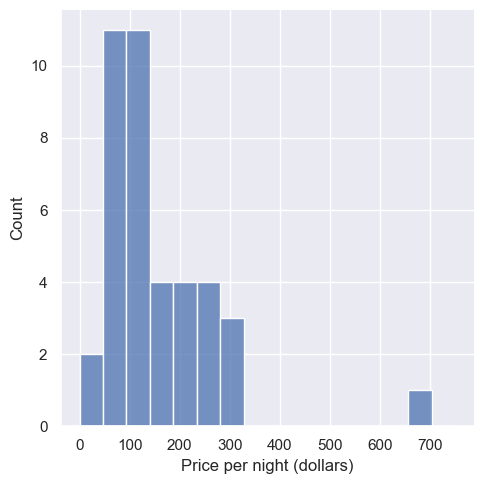

In [24]:
g = sns.displot(data=one_sample, x="price", bins=np.linspace(0, 750, 17))
g.set(xlabel="Price per night (dollars)")
plt.show()

The histogram for the sample is skewed, with a few observations out to the right. The
mean of the sample is \\$154.51.
Remember, in practice, we usually only have this one sample from the population. So
this sample and estimate are the only data we can work with.

We now perform steps 1&ndash;5 listed above to generate a single bootstrap
sample in Python and calculate a point estimate from that bootstrap sample. We will
continue using the `sample` function of our dataframe,
Critically, note that we now
set `frac=1` ("fraction") to indicate that we want to draw as many samples as there are rows in the dataframe
(we could also have set `n=40` but then we would need to manually keep track of how many rows there are).
Since we need to sample with replacement when bootstrapping,
we change the `replace` parameter to `True`.

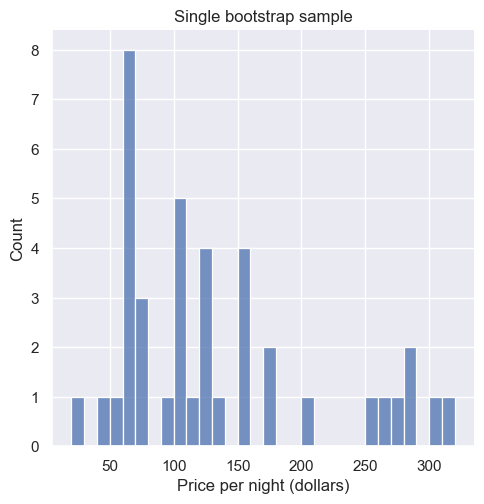

In [25]:
boot1 = one_sample.sample(frac=1, replace=True)
g = sns.displot(data=boot1, x="price", bins=np.arange(20, 321, 10))
g.set(title="Single bootstrap sample", 
     xlabel="Price per night (dollars)")
plt.show()


In [26]:
boot1["price"].mean()

132.65

Notice that the histogram of our bootstrap sample
has a similar shape to the original sample histogram. Though the shapes of
the distributions are similar, they are not identical. You'll also notice that
the original sample mean and the bootstrap sample mean differ. How might that
happen? Remember that we are sampling with replacement from the original
sample, so we don't end up with the same sample values again. We are *pretending*
that our single sample is close to the population, and we are trying to
mimic drawing another sample from the population by drawing one from our original
sample.

Let's now take 20,000 bootstrap samples from the original sample (`one_sample`)
and calculate the means for
each of those replicates. Recall that this assumes that `one_sample` *looks like*
our original population; but since we do not have access to the population itself,
this is often the best we can do.
Note that here we break the list comprehension over multiple lines
so that it is easier to read.

In [27]:
boot20000 = pd.concat([
    one_sample.sample(frac=1, replace=True).assign(replicate=n)
    for n in range(20000)
])
boot20000

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
2286,2287,Marpole,Entire home/apt,4,1 bath,2,2,105.0,0
254,255,Downtown,Entire home/apt,4,1.5 baths,2,2,300.0,0
2246,2247,Mount Pleasant,Entire home/apt,4,1 bath,1,2,105.0,0
4579,4580,Downtown,Entire home/apt,3,1 bath,1,2,160.0,0
4495,4496,Riley Park,Entire home/apt,2,1 bath,1,1,115.0,0
...,...,...,...,...,...,...,...,...,...
1997,1998,Downtown,Entire home/apt,6,2 baths,3,3,257.0,19999
241,242,Hastings-Sunrise,Private room,2,1 shared bath,1,1,50.0,19999
1878,1879,Fairview,Private room,2,1 private bath,1,1,175.0,19999
1783,1784,Downtown Eastside,Private room,2,1 private bath,1,1,60.0,19999


Let's take a look at histograms of the first six replicates of our bootstrap samples.

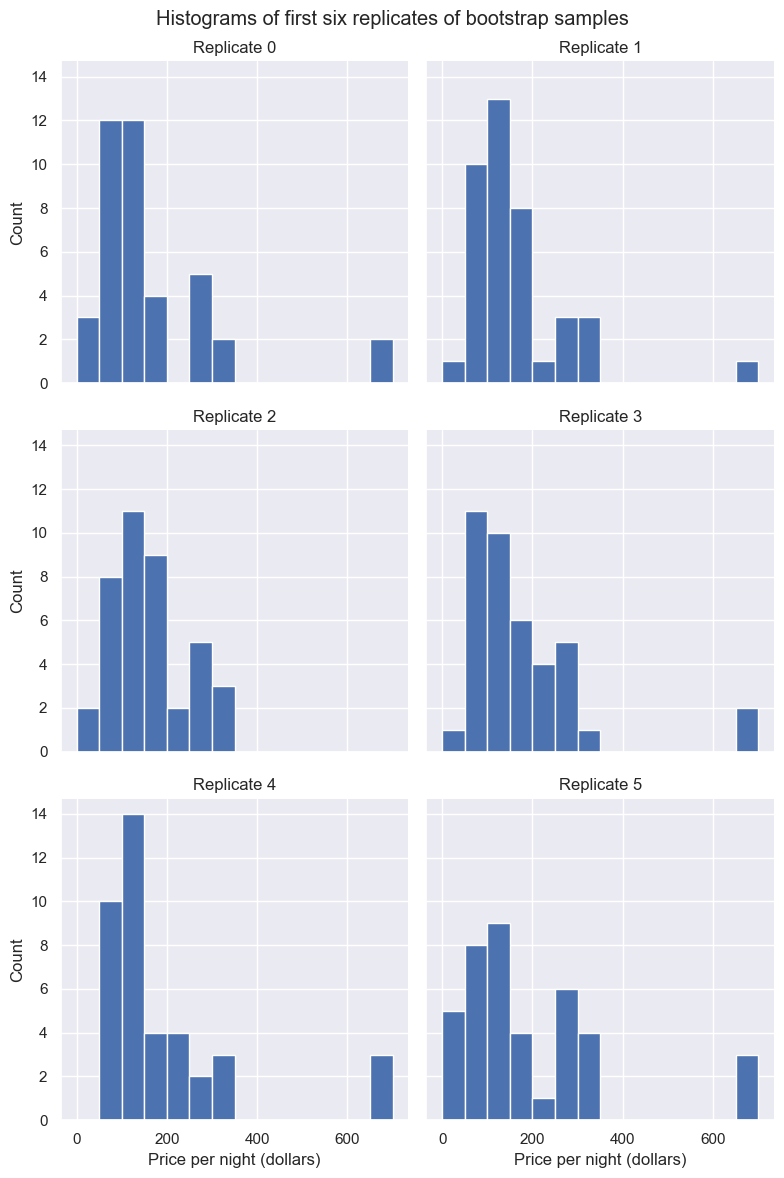

In [28]:
six_bootstrap_samples = boot20000.query("replicate < 6")

# Create a seaborn FacetGrid object (allows for subplots)
g = sns.FacetGrid(six_bootstrap_samples, col="replicate", col_wrap=2, height=4)

# Plot histograms for each replicate
g.map(plt.hist, "price", bins=np.arange(0, 701, 50))

# Set axis labels and title
g.set_axis_labels("Price per night (dollars)", "Count")
g.set_titles(col_template="Replicate {col_name}")

# Label figure
g.fig.suptitle("Histograms of first six replicates of bootstrap samples")

# Adjust layout
plt.tight_layout()
plt.show()

We can see how the distributions of the
bootstrap samples differ. If we calculate the sample mean for each of
these six samples, we can see that these are also different between samples.
To compute the mean for each sample,
we first group by the "replicate" which is the column containing the sample/replicate number.
Then we compute the mean of the `price` column and rename it to `mean_price`
for it to be more descriptive.
Finally we use `reset_index` to get the `replicate` values back as a column in the dataframe. (Note that for readability, you can enclose your Python expression in parentheses so that you can break up your expression across multiple lines.)

In [29]:
(
    six_bootstrap_samples
    .groupby("replicate")
    ["price"]
    .mean()
    .reset_index()
    .rename(columns={"price": "mean_price"})
)


,replicate,mean_price
0,0,155.67175
1,1,154.42500
2,2,149.35000
3,3,169.13225
4,4,179.79675
5,5,188.28225


The distributions and the means differ between the bootstrapped samples
because we are sampling *with replacement*.
If we instead would have sampled *without replacement*,
we would end up with the exact same values in the sample each time.

We will now calculate point estimates of the mean for our 20,000 bootstrap samples and
generate a bootstrap distribution of these point estimates. The bootstrap
distribution (figure below) suggests how we might expect
our point estimate to behave if we take multiple samples.

In [30]:
boot20000_means = (
    boot20000
    .groupby("replicate")
    ["price"]
    .mean()
    .reset_index()
    .rename(columns={"price": "mean_price"})
)

boot20000_means

,replicate,mean_price
0,0,155.67175
1,1,154.42500
2,2,149.35000
3,3,169.13225
4,4,179.79675
...,...,...
19995,19995,159.29675
19996,19996,137.20000
19997,19997,136.55725
19998,19998,161.93950


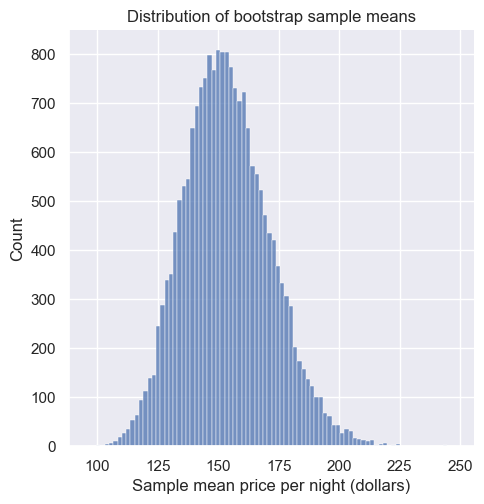

In [31]:
g = sns.displot(data=boot20000_means, x="mean_price")
g.set(title="Distribution of bootstrap sample means",
     xlabel="Sample mean price per night (dollars)")
plt.show()

Let's compare the bootstrap distribution&mdash;which we construct by taking many samples from our original sample of size 40&mdash;with
the true sampling distribution&mdash;which corresponds to taking many samples from the population.

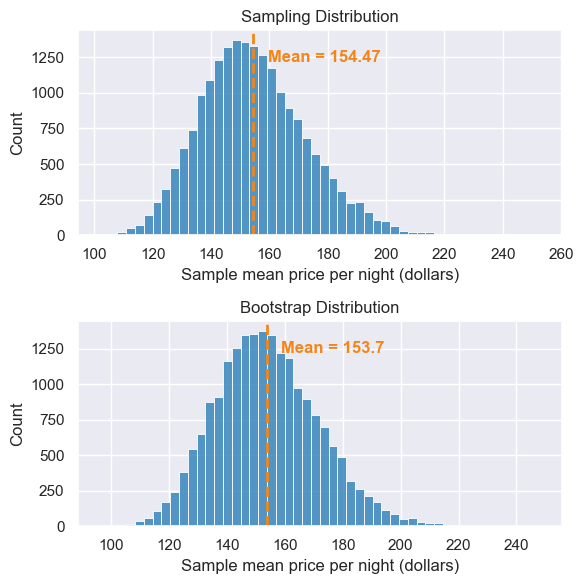

In [32]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

# Plot sampling distribution
sns.histplot(sample_estimates['mean_price'], bins=50, ax=axs[0], color="#1f77b4")
axs[0].set_xlabel("Sample mean price per night (dollars)")
axs[0].axvline(x=np.mean(sample_estimates['mean_price']), color="#f58518", linestyle='--', linewidth=2)
axs[0].text(
    x=np.mean(sample_estimates['mean_price'] + 5),
    y=1250,
    s=f"Mean = {np.mean(sample_estimates['mean_price']).round(2)}",
    color="#f58518",
    size=12,
    ha='left',
    va='center',
    fontweight='bold',
)

# Plot bootstrap distribution
sns.histplot(boot20000_means['mean_price'], bins=50, ax=axs[1], color="#1f77b4")
axs[1].set_xlabel("Sample mean price per night (dollars)")
axs[1].axvline(x=np.mean(boot20000_means['mean_price']), color="#f58518", linestyle='--', linewidth=2)
axs[1].text(
    x=np.mean(boot20000_means['mean_price'] + 5),
    y=1250,
    s=f"Mean = {np.mean(boot20000_means['mean_price']).round(1)}",
    color="#f58518",
    size=12,
    ha='left',
    va='center',
    fontweight='bold',
)

# Titles
axs[0].set_title("Sampling Distribution")
axs[1].set_title("Bootstrap Distribution")

# Adjust layout and show figures
plt.tight_layout()
plt.show()

There are two essential points that we can take away from
the above histograms. First, the shape and spread of the true sampling
distribution and the bootstrap distribution are similar; the bootstrap
distribution lets us get a sense of the point estimate's variability. The
second important point is that the means of these two distributions are
slightly different. The sampling distribution is centered at
\\$154.51, the population mean value. However, the bootstrap
distribution is centered at the original sample's mean price per night,
\\$153.48. Because we are resampling from the
original sample repeatedly, we see that the bootstrap distribution is centered
at the original sample's mean value (unlike the sampling distribution of the
sample mean, which is centered at the population parameter value).

<div class="alert alert-info"> <b>Take a minute to appreciate what the bootstrapping technique has allowed us to accomplish.</b> With a single sample of 40 observations (from a much, much larger population), we've <i>very</i> closely approximated the true sampling distribution, which by definition uses the entire population of observations to compute, something we almost never have access to in real world data science applications. In essence, bootstrapping is a means of simulating many data collections (or experiments), premised only on the assumption that our single sample is representative of the population.</d>

The flow chart below summarizes the bootstrapping process.
The idea here is that we can use this distribution of bootstrap sample means to
approximate the sampling distribution of the sample means when we only have one
sample. Since the bootstrap distribution pretty well approximates the sampling
distribution spread, we can use the bootstrap spread to help us develop a
plausible range for our population parameter along with our estimate!

![](https://datasciencebook.ca/_main_files/figure-html/11-bootstrapping7-1.png)

### Using the bootstrap to calculate a plausible range

Now that we have constructed our bootstrap distribution, let's use it to create
an approximate 95\% percentile bootstrap confidence interval (one of the most common applications of bootstrapping).
A **confidence interval** is a range of plausible values for the population parameter. We will
find the range of values covering the middle 95\% of the bootstrap
distribution, giving us a 95\% confidence interval.  You may be wondering, what
does "95\% confidence" mean? If we took 100 random samples and calculated 100
95\% confidence intervals, then about 95\% of the ranges would capture the
population parameter's value.  Note there's nothing special about 95\%. We
could have used other levels, such as 90\% or 99\%. There is a balance between
our level of confidence and precision. A higher confidence level corresponds to
a wider range of the interval, and a lower confidence level corresponds to a
narrower range. Therefore the level we choose is based on what chance we are
willing to take of being wrong based on the implications of being wrong for our
application. In general, we choose confidence levels to be comfortable with our
level of uncertainty but not so strict that the interval is unhelpful. For
instance, if our decision impacts human life and the implications of being
wrong are deadly, we may want to be very confident and choose a higher
confidence level.

To calculate a 95\% percentile bootstrap confidence interval, we will do the following:

1. Arrange the observations in the bootstrap distribution in ascending order.
2. Find the value such that 2.5\% of observations fall below it (the 2.5\% percentile). Use that value as the lower bound of the interval.
3. Find the value such that 97.5\% of observations fall below it (the 97.5\% percentile). Use that value as the upper bound of the interval.

To do this in Python, we wiill again use the `quantile` function of our DataFrame.
Quantiles are expressed in proportions rather than percentages,
so the 2.5th and 97.5th percentiles
would be quantiles 0.025 and 0.975, respectively.

In [33]:
ci_bounds = boot20000_means["mean_price"].quantile([0.025, 0.975])
ci_bounds

0.025    121.607069
0.975    191.525362
Name: mean_price, dtype: float64

Our interval, \\$121.6 to \\$191.5, captures
the middle 95\% of the sample mean prices in the bootstrap distribution. We can
visualize the interval on our distribution in the following figure.

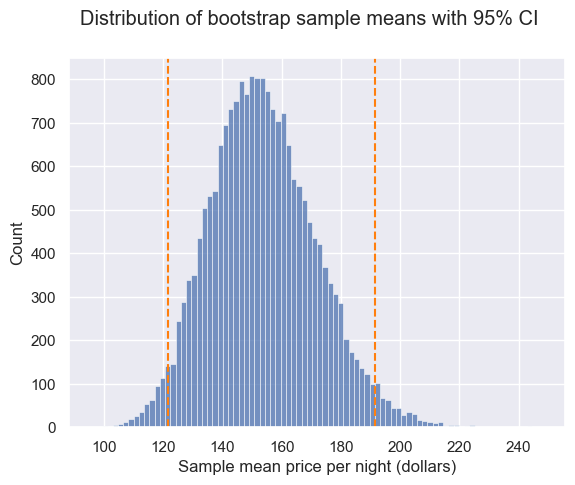

In [34]:
fig, ax = plt.subplots()
sns.histplot(data=boot20000_means, x="mean_price", ax=ax)
ax.set_ylim(0, 850)
ax.set_xlabel("Sample mean price per night (dollars)")
ax.vlines(ci_bounds, 0, ax.get_ylim()[1], color="tab:orange", linestyle="--")
fig.suptitle("Distribution of bootstrap sample means with 95% CI")
plt.show()

To finish our estimation of the population parameter, we would report the point
estimate and our confidence interval's lower and upper bounds. Here the sample
mean price-per-night of 40 Airbnb listings was
\\$153.48, and we are 95% "confident" that the true
population mean price-per-night for all Airbnb listings in Vancouver is between
\\$(121.6, 191.5).
Notice that our interval does indeed contain the true
population mean value, \\$154.51! However, in
practice, we would not know whether our interval captured the population
parameter or not because we usually only have a single sample, not the entire
population. This is the best we can do when we only have one sample!

This chapter is only the beginning of the journey into statistical inference.
We can extend the concepts learned here to do much more than report point
estimates and confidence intervals, such as testing for real differences
between populations, tests for associations between variables, and so much
more. We have just scratched the surface of statistical inference; however, the
material presented here will serve as a solid foundation for more advanced
statistical techniques you may learn about in the future!


## Exercises

Practice exercises for the material covered in this chapter
can be found in the accompanying
[worksheets repository](https://worksheets.python.datasciencebook.ca)
in the two "Statistical inference" rows.
You can launch an interactive version of each worksheet in your browser by clicking the "launch binder" button.
You can also preview a non-interactive version of each worksheet by clicking "view worksheet."
If you instead decide to download the worksheets and run them on your own machine,
make sure to follow the instructions for computer setup
found in {numref}`Chapter %s <move-to-your-own-machine>`. This will ensure that the automated feedback
and guidance that the worksheets provide will function as intended.


## Additional resources

- Chapters 4 to 7 of [OpenIntro Statistics](https://www.openintro.org/book/os/)
  provide a good next step in learning about inference. Although it is still certainly
  an introductory text, things get a bit more mathematical here. Depending on
  your background, you may actually want to start going through Chapters 1 to 3
  first, where you will learn some fundamental concepts in probability theory.
  Although it may seem like a diversion, probability theory is *the language of
  statistics*; if you have a solid grasp of probability, more advanced statistics
  will come naturally to you!
- The first two chapters of [An Introduction to the Bootstrap](https://www.hms.harvard.edu/bss/neuro/bornlab/nb204/statistics/bootstrap.pdf) are a tremendous resource for bolstering your understanding of bootstrapping. 


---
This chapter has been adapted from the excellent online textbook [Data Science: A First Introduction (Python Edition](https://python.datasciencebook.ca/inference.html) used in UBC's Python-flavored DSCI 100 course.  